# Historical mentions of "quid pro quo" by users on Twitter

In [1]:
import pandas as pd
import geopandas as gpd
import cpi
from urllib.request import urlopen 
import pyarrow
import jenkspy
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np
from altair import datum
import altair as alt
alt.renderers.enable('notebook')
import altair_latimes as lat
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,8)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000
pd.options.display.float_format = '{:,.2f}'.format
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
all = pd.read_json('/Users/mhustiles/data/github/twint/quidproquo/all.json', lines=True)

In [3]:
len(all)

1597842

In [4]:
verified = pd.read_json('/Users/mhustiles/data/github/twint/quidproquo/quidproquo-verified.json', lines=True)

In [5]:
tweets = pd.DataFrame(all.loc[all.astype(str).drop_duplicates().index])

In [124]:
small = pd.DataFrame(tweets.head(1000))

In [125]:
small['eastern_created_at'] = small['created_at'].dt.tz_localize("GMT").dt.tz_convert('US/Eastern')

In [126]:
small['eastern_date_time'] = pd.to_datetime(small['eastern_created_at']).dt.strftime('%Y/%m/%d %H:%M')

In [127]:
small['eastern_date'] = pd.to_datetime(small['eastern_created_at']).dt.strftime('%Y/%m/%d/')
small['eastern_time'] = small['eastern_created_at'].dt.time
small['eastern_date_time'] = pd.to_datetime(small.eastern_date_time)
small['eastern_date'] = pd.to_datetime(small.eastern_date)

In [131]:
sondland_testimony = tweets[(tweets['eastern_date_time'] > '2019-11-20 00:00:00') \
                            & (tweets['eastern_date_time'] <= '2019-11-20 23:59:59')]

In [132]:
len(sondland_testimony)

76979

In [133]:
sondland_testimony.day.value_counts()

20    76979
Name: day, dtype: int64

In [87]:
tweets['eastern_created_at'] = tweets['created_at'].dt.tz_localize("GMT").dt.tz_convert('US/Eastern')
tweets['eastern_date_time'] = pd.to_datetime(tweets['eastern_created_at']).dt.strftime('%Y/%m/%d %H:%M')
tweets['eastern_date'] = pd.to_datetime(tweets['eastern_created_at']).dt.strftime('%Y/%m/%d/')
tweets['eastern_time'] = tweets['eastern_created_at'].dt.time
tweets.eastern_date_time = pd.to_datetime(tweets.eastern_date_time)
tweets['eastern_date'] = pd.to_datetime(tweets.eastern_date)

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [76]:
tweets['year'] = tweets['eastern_created_at'].dt.year
tweets['month'] = tweets['eastern_created_at'].dt.month
tweets['day'] = tweets['eastern_created_at'].dt.day
tweets['hour'] = tweets['eastern_created_at'].dt.hour
tweets['minute'] = tweets['eastern_created_at'].dt.minute

In [77]:
tweets['weekofyear'] = tweets['eastern_created_at'].dt.weekofyear

In [78]:
tweets[['id', 'user_id', 'year', 'conversation_id','month','day','hour','minute','weekofyear']] =\
tweets[['id', 'user_id', 'year', 'conversation_id','month','day','hour','minute','weekofyear']].astype(str)

In [79]:
len(tweets)

1248250

In [80]:
tweets.loc[0]

cashtags                                                             []
conversation_id                                     1199731502965239808
created_at                                          2019-11-27 16:47:34
date                                                2019-11-27 00:00:00
geo                                                                    
hashtags                                                             []
id                                                  1199731502965239814
likes_count                                                           3
link                  https://twitter.com/jhedelstein/status/1199731...
mentions                                                             []
name                                              Jean Hannah Edelstein
near                                                                   
photos                                                               []
place                                                           

In [81]:
tweets.sort_values(by='date', ascending=False).head(5)

cashtags      conversation_id          created_at       date geo  \
0             []  1199731502965239808 2019-11-27 16:47:34 2019-11-27       
1341856       []  1199697166513721344 2019-11-27 14:31:08 2019-11-27       
1341830       []  1199698231594233856 2019-11-27 14:35:22 2019-11-27       
1341831       []  1199428622794100736 2019-11-27 14:35:17 2019-11-27       
1341832       []  1199352946187800576 2019-11-27 14:35:09 2019-11-27       

                   hashtags                   id  likes_count  \
0                        []  1199731502965239814            3   
1341856                  []  1199697166513721344            0   
1341830  [#thisisgoingwell]  1199698231594233858            0   
1341831                  []  1199698212459823105            0   
1341832                  []  1199698175562592257            0   

                                                      link  \
0        https://twitter.com/jhedelstein/status/1199731...   
1341856  https://twitter.com/nearlyfamous/status/119969...   
1341830  https://twitter.com/phuffdaddy/status/11996982...   
1341831  https://twitter.com/vhogan52/status/1199698212...   
1341832  https://twitter.com/WillBean88/status/11996981...   

                                                  mentions  \
0                                                       []   
1341856                                                 []   
1341830                                                 []   
1341831                                  [marshablackburn]   
1341832  [ghost93773599, deltg, coreyadams13, justmeloo...   

                          name near photos place quote_url  replies_count  \
0        Jean Hannah Edelstein          []                              0   
1341856                   Dave          []                              0   
1341830         Priscilla Huff          []                              0   
1341831     Victoria Hogan 🚨🚨🚨          []                              0   
1341832           William Bean          []                              2   

                                                  reply_to  retweet  \
0        [{'user_id': '232501933', 'username': 'jhedels...    False   
1341856  [{'user_id': '20378114', 'username': 'nearlyfa...    False   
1341830  [{'user_id': '26061966', 'username': 'phuffdad...    False   
1341831  [{'user_id': '904549734', 'username': 'vhogan5...    False   
1341832  [{'user_id': '256925256', 'username': 'WillBea...    False   

        retweet_date retweet_id  retweets_count source      time timezone  \
0                                             0         08:47:34      PST   
1341856                                       0         06:31:08      PST   
1341830                                       0         06:35:22      PST   
1341831                                       0         06:35:17      PST   
1341832                                       0         06:35:09      PST   

                                                     tweet  \
0        Baby has learned to drop his food to the dog w...   
1341856  The cat says no quid pro quo The dog says no q...   
1341830  Trump’s “No Quid Pro Quo” Statements Are Clear...   
1341831  1. It’s not a transcript. 2. We all read it. 3...   
1341832  No... "Quid Pro Quo" was something you guys st...   

                                                      urls    user_id user_rt  \
0                                                       []  232501933           
1341856                                                 []   20378114           
1341830  [https://slate.com/news-and-politics/2019/11/t...   26061966           
1341831                                                 []  904549734           
1341832                                                 []  256925256           

        user_rt_id      username  video        eastern_created_at  \
0                    jhedelstein      0 2019-11-27 16:47:34-05:00   
1341856             nearlyfamous      0 2019-11-27 14:31:08-05:

In [82]:
today = pd.datetime.today().strftime("%m/%d/%Y")

### Isoldate from when sondland texted taylor saying "no quid pro quo" to today

In [83]:
ukraine = tweets[(tweets['date'] > '2019-09-09') & (tweets['date'] < today)]

### Sondland's testimony day

In [139]:
sondland = tweets[(tweets['eastern_date'] > '2019-11-19') & ( tweets['eastern_date']< '2019-11-21') ]

In [140]:
len(sondland)

76999

In [ ]:
sondland_

---

In [141]:
sept = tweets[(tweets['date'] > '2019-09-09') & (tweets['date'] < '2019-09-30')]

In [142]:
len(ukraine)

728374

In [20]:
sept_dates = sept.groupby(['date', 'hour']).agg('size').reset_index(name='count')

In [21]:
early = sept[sept['tweet'].str.contains('Ukraine')]

In [22]:
early.tail()

cashtags      conversation_id          created_at       date geo  \
1105950       []  1172203012766490624 2019-09-12 18:19:29 2019-09-12       
1105954       []  1172151706701959168 2019-09-12 18:02:55 2019-09-12       
1106147       []  1171760235935125504 2019-09-11 18:27:02 2019-09-11       
1106350       []  1171496425764425728 2019-09-10 18:57:38 2019-09-10       
1106409       []  1171403872570683392 2019-09-10 13:28:22 2019-09-10       

        hashtags                   id  likes_count  \
1105950       []  1172213155226902528            0   
1105954       []  1172208986394742784            0   
1106147       []  1171852669268348928            0   
1106350       []  1171497981473746947            0   
1106409       []  1171415118246240256            6   

                                                      link  \
1105950  https://twitter.com/Mammon_is_God/status/11722...   
1105954  https://twitter.com/DiogenesQuest/status/11722...   
1106147  https://twitter.com/DiogenesQuest/status/11718...   
1106350  https://twitter.com/Mgeotsa/status/11714979814...   
1106409  https://twitter.com/tina_cutsinger/status/1171...   

                                       mentions                        name  \
1105950                               [thehill]                      Mammon   
1105954  [realdonaldtrump, guypbenson, foxnews]            Gregory G. Sarno   
1106147                       [realdonaldtrump]            Gregory G. Sarno   
1106350                       [tomthunkitsmind]  Rule of Law: Impeach Trump   
1106409       [parisbr00506835, donaldjtrumpjr]              Tina Cutsinger   

        near photos place quote_url  replies_count  \
1105950          []                              0   
1105954          []                              0   
1106147          []                              0   
1106350          []                              0   
1106409          []                              1   

                                                  reply_to  retweet  \
1105950  [{'user_id': '819375397666254850', 'username':...    False   
1105954  [{'user_id': '1010620973085675521', 'username'...    False   
1106147  [{'user_id': '1010620973085675521', 'username'...    False   
1106350  [{'user_id': '279369580', 'username': 'Mgeotsa...    False   
1106409  [{'user_id': '822863172310802432', 'username':...    False   

        retweet_date retweet_id  retweets_count source      time timezone  \
1105950                                       0         11:19:29      PST   
1105954                                       0         11:02:55      PST   
1106147                                       0         11:27:02      PST   
1106350                                       0         11:57:38      PST   
1106409                                       0         06:28:22      PST   

                                                     tweet urls  \
1105950  Guliani just asked the Ukraine for dirt on Bid...   []   
1105954  [4th of 5] Rachel Maddow’s 11/30/2018 show exp...   []   
1106147  [4th of 5] Rachel Maddow’s 11/30/2018 show exp...   []   
1106350  Yes & abuse of power, payoff of porn stars (pe...   []   
1106409  When liberal’s start holding their own to acco...   []   

                     user_id user_rt user_rt_id        username  video  \
1105950   819375397666254850                      mammon_is_god      0   
1105954  1010620973085675521                      diogenesquest      0   
1106147  1010620973085675521                      diogenesquest      0   
1106350            279369580                            mgeotsa      0   
1106409   822863172310802432                     tina_cutsinger      0   

               eastern_created_at   eastern_date_time eastern_date  \
1105950 2019-09-12 14:19:29-04:00 2019-09-12 14:19:00   2019-09-12   
1105954 2019-09-12 14:02:55-04:00 2019-09-12 14:02:00   2019-09-12   
1106147 2019-09-11 14:27:02-04:00 2019-09-11 14:27:00   2019-09-11   
1106350 2019-09-10 14:57:38-04:00 2

In [23]:
dates = tweets.groupby(['date', 'hour']).agg('size').reset_index(name='count')

In [24]:
dates.sort_values(by='date', ascending=False).head()

date hour  count
79712 2019-11-27    9    360
79711 2019-11-27    8    304
79710 2019-11-27    7    223
79709 2019-11-27    6    179
79708 2019-11-27    5    127

In [25]:
bigdates = dates[dates['count'] > 100]

In [26]:
bigdates.sort_values(by='count', ascending=False).head()

date hour  count
79537 2019-11-20   10   8921
79538 2019-11-20   11   8742
79541 2019-11-20   14   7471
79540 2019-11-20   13   7446
79539 2019-11-20   12   7287

In [27]:
# alt.Chart(dates).mark_area().encode(
#     x=alt.X('hour:N', axis=alt.Axis(values=(0,12,23)), title="Hour"),
#     y=alt.Y("count:Q", title=" ", axis=alt.Axis(tickCount=5, values=(0,5000,10000,15000), format='~s')),
#     facet=alt.Facet('date:T', title=' ')
# ).properties(width=80, columns=8,height=80, title='Mentions of "quid pro quo" on Twitter')

In [28]:
# alt.Chart(dates).mark_bar().encode(
#     x=alt.X('monthdate(date):T', title="Date"),
#     y=alt.Y("count:Q", title=" ", axis=alt.Axis(tickCount=3, format=',S')),
#     facet=alt.Facet('year(date):N')
# ).properties(width=800, columns=1,height=300, title='Verified mentions of "quid pro quo" on Twitter')

---

### Resampling

In [29]:
tweets.dtypes

cashtags                                  object
conversation_id                           object
created_at                        datetime64[ns]
date                              datetime64[ns]
geo                                       object
hashtags                                  object
id                                        object
likes_count                                int64
link                                      object
mentions                                  object
name                                      object
near                                      object
photos                                    object
place                                     object
quote_url                                 object
replies_count                              int64
reply_to                                  object
retweet                                     bool
retweet_date                              object
retweet_id                                object
retweets_count      

In [30]:
days = tweets.resample('D', on='eastern_created_at').agg('size')
weeks = tweets.resample('W', on = 'eastern_created_at').agg('size')
months = tweets.resample('M', on = 'eastern_created_at').agg('size')

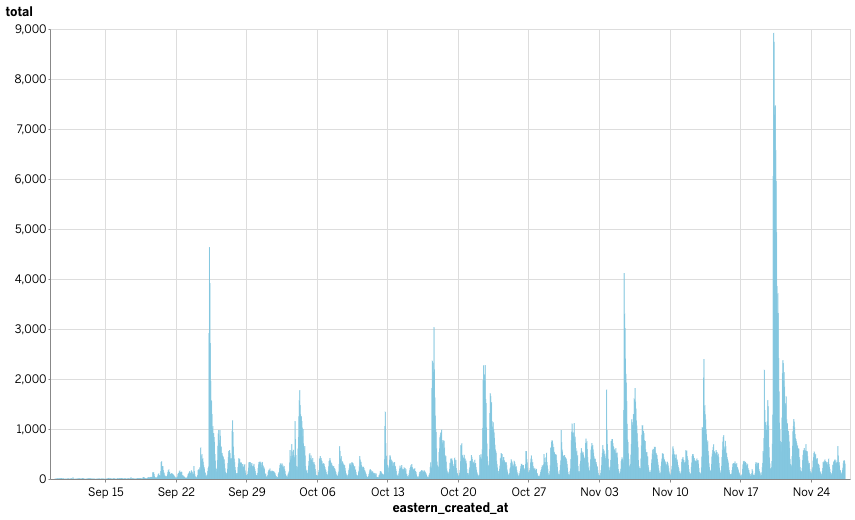

In [47]:
hours = ukraine.resample('H', on = 'eastern_created_at').agg('size').reset_index(name='total')
alt.Chart(hours).mark_bar(size=1).encode(
    x='eastern_created_at',
    y='total'
)

In [144]:
minutes = sondland_testimony.resample('T', on = 'eastern_created_at').agg('size').reset_index(name='total')

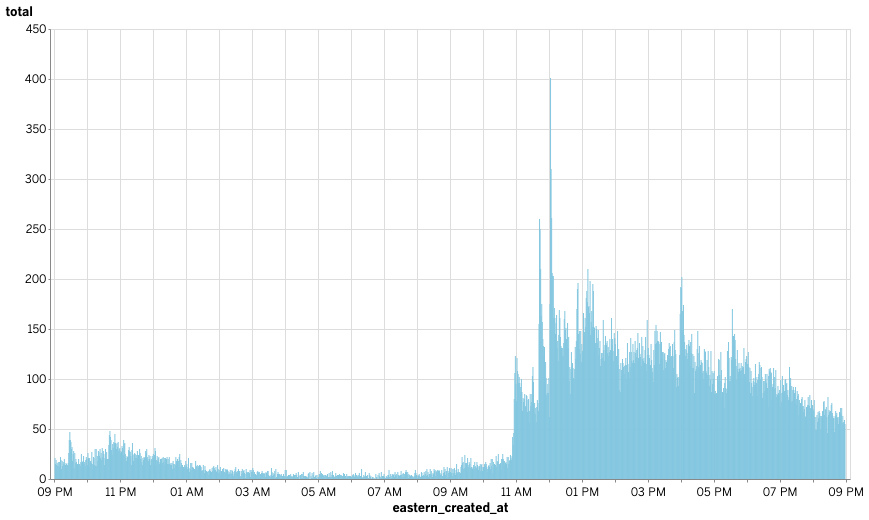

In [145]:
alt.Chart(minutes).mark_bar(size=1).encode(
    x='eastern_created_at',
    y='total'
)

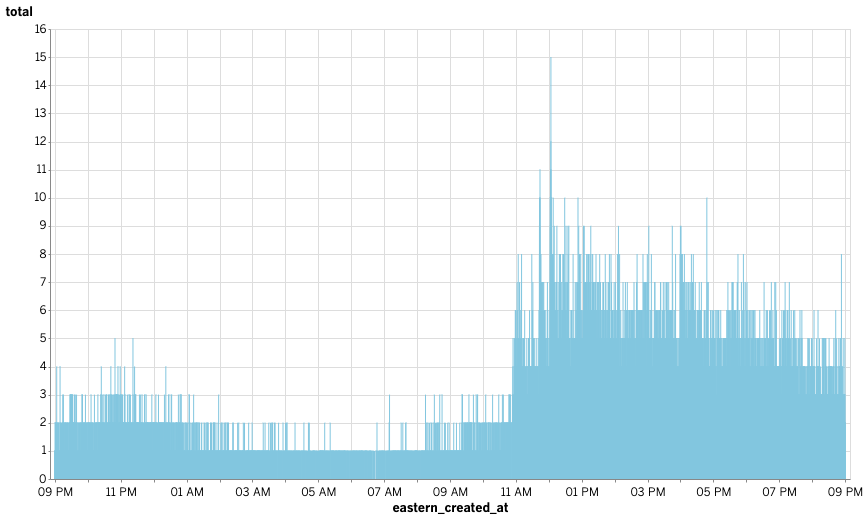

In [146]:
seconds = sondland.resample('S', on = 'eastern_created_at').agg('size').reset_index(name='total')
alt.Chart(seconds).mark_bar(size=1).encode(
    x='eastern_created_at',
    y='total'
)

In [61]:
sondland.dtypes

cashtags                                  object
conversation_id                           object
created_at                        datetime64[ns]
date                              datetime64[ns]
geo                                       object
hashtags                                  object
id                                        object
likes_count                                int64
link                                      object
mentions                                  object
name                                      object
near                                      object
photos                                    object
place                                     object
quote_url                                 object
replies_count                              int64
reply_to                                  object
retweet                                     bool
retweet_date                              object
retweet_id                                object
retweets_count      

In [62]:
sondland[['created_at', 'eastern_created_at']]

created_at        eastern_created_at
1307    2019-11-21 04:57:28 2019-11-20 23:57:28-05:00
1308    2019-11-21 04:53:16 2019-11-20 23:53:16-05:00
1309    2019-11-21 04:51:38 2019-11-20 23:51:38-05:00
1310    2019-11-21 04:51:30 2019-11-20 23:51:30-05:00
1311    2019-11-21 04:51:29 2019-11-20 23:51:29-05:00
1312    2019-11-21 04:51:00 2019-11-20 23:51:00-05:00
1313    2019-11-21 04:50:41 2019-11-20 23:50:41-05:00
1314    2019-11-21 04:50:30 2019-11-20 23:50:30-05:00
1315    2019-11-21 04:50:03 2019-11-20 23:50:03-05:00
1316    2019-11-21 04:50:00 2019-11-20 23:50:00-05:00
1317    2019-11-21 04:50:00 2019-11-20 23:50:00-05:00
1318    2019-11-21 04:49:48 2019-11-20 23:49:48-05:00
1319    2019-11-21 04:48:00 2019-11-20 23:48:00-05:00
1320    2019-11-21 04:41:48 2019-11-20 23:41:48-05:00
1321    2019-11-21 04:41:05 2019-11-20 23:41:05-05:00
1322    2019-11-21 04:41:00 2019-11-20 23:41:00-05:00
1323    2019-11-21 04:37:29 2019-11-20 23:37:29-05:00
1324    2019-11-21 04:32:20 2019-11-20 23:32:20-05:00
1325    2019-11-21 04:30:44 2019-11-20 23:30:44-05:00
1326    2019-11-21 04:30:00 2019-11-20 23:30:00-05:00
1327    2019-11-21 04:24:40 2019-11-20 23:24:40-05:00
1328    2019-11-21 04:23:13 2019-11-20 23:23:13-05:00
1329    2019-11-21 04:19:51 2019-11-20 23:19:51-05:00
1330    2019-11-21 04:17:27 2019-11-20 23:17:27-05:00
1331    2019-11-21 04:16:31 2019-11-20 23:16:31-05:00
1332    2019-11-21 04:15:07 2019-11-20 23:15:07-05:00
1333    2019-11-21 04:14:09 2019-11-20 23:14:09-05:00
1334    2019-11-21 04:14:02 2019-11-20 23:14:02-05:00
1335    2019-11-21 04:12:02 2019-11-20 23:12:02-05:00
1336    2019-11-21 04:10:15 2019-11-20 23:10:15-05:00
1337    2019-11-21 04:07:53 2019-11-20 23:07:53-05:00
1338    2019-11-21 04:05:03 2019-11-20 23:05:03-05:00
1339    2019-11-21 04:02:36 2019-11-20 23:02:36-05:00
1340    2019-11-21 04:02:04 2019-11-20 23:02:04-05:00
1341    2019-11-21 04:00:03 2019-11-20 23:00:03-05:00
1342    2019-11-21 03:59:56 2019-11-20 22:59:56-05:00
1343    2019-11-21 03:57:30 2019-11-20 22:57:30-05:00
1344    2019-11-21 03:57:30 2019-11-20 22:57:30-05:00
1345    2019-11-21 03:56:24 2019-11-20 22:56:24-05:00
1346    2019-11-21 03:51:38 2019-11-20 22:51:38-05:00
1347    2019-11-21 03:46:13 2019-11-20 22:46:13-05:00
1348    2019-11-21 03:46:03 2019-11-20 22:46:03-05:00
1349    2019-11-21 03:46:02 2019-11-20 22:46:02-05:00
1350    2019-11-21 03:39:12 2019-11-20 22:39:12-05:00
1351    2019-11-21 03:36:49 2019-11-20 22:36:49-05:00
1352    2019-11-21 03:35:09 2019-11-20 22:35:09-05:00
1353    2019-11-21 03:35:00 2019-11-20 22:35:00-05:00
1354    2019-11-21 03:32:13 2019-11-20 22:32:13-05:00
1355    2019-11-21 03:30:06 2019-11-20 22:30:06-05:00
1356    2019-11-21 03:29:46 2019-11-20 22:29:46-05:00
1357    2019-11-21 03:24:12 2019-11-20 22:24:12-05:00
1358    2019-11-21 03:20:36 2019-11-20 22:20:36-05:00
1359    2019-11-21 03:18:05 2019-11-20 22:18:05-05:00
1360    2019-11-21 03:14:57 2019-11-20 22:14:57-05:00
1361    2019-11-21 03:14:38 2019-11-20 22:14:38-05:00
1362    2019-11-21 03:13:47 2019-11-20 22:13:47-05:00
1363    2019-11-21 03:11:02 2019-11-20 22:11:02-05:00
1364    2019-11-21 03:10:08 2019-11-20 22:10:08-05:00
1365    2019-11-21 03:08:07 2019-11-20 22:08:07-05:00
1366    2019-11-21 03:06:37 2019-11-20 22:06:37-05:00
1367    2019-11-21 03:05:07 2019-11-20 22:05:07-05:00
1368    2019-11-21 03:03:17 2019-11-20 22:03:17-05:00
1369    2019-11-21 03:03:03 2019-11-20 22:03:03-05:00
1370    2019-11-21 02:59:42 2019-11-20 21:59:42-05:00
1371    2019-11-21 02:57:52 2019-11-20 21:57:52-05:00
1372    2019-11-21 02:54:10 2019-11-20 21:54:10-05:00
1373    2019-11-21 02:52:36 2019-11-20 21:52:36-05:00
1374    2019-11-21 02:52:11 2019-11-20 21:52:11-05:00
1375    2019-11-21 02:50:38 2019-11-20 21:50:38-05:00
1376    2019-11-21 02:48:44 2019-11-20 21:48:44-05:00
1377    2019-11-21 02:47:37 2019-11-20 21:47:37-05:00
1378    2019-11-21 02:43:08 2019-11-20 21:43:08-05:00
1379    2019-11-21 02:40:30 2019-11-20 21:40:30-05:00
1380    2019-11-21 02